In [4]:
import pandas as pd
import json

# 파일 경로 설정
train_file_path = 'data/train.csv'
test_file_path = 'data/test.json'

# Train 데이터 불러오기
train_data = pd.read_csv(train_file_path)

# Test 데이터 불러오기
with open(test_file_path, 'r', encoding='utf-8') as f:
    test_data = json.load(f)

# Train 데이터 확인
print(train_data.head())


   idx      class                                       conversation
0    0      협박 대화  지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1    1      협박 대화  길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2    2  기타 괴롭힘 대화  너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3    3      갈취 대화  어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4    4      갈취 대화  저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [5]:
# Test 데이터 확인
print(test_data)

{'t_000': {'text': '아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나보네 그럼 취소할까요 아가씨 내 여기단골이니 담에 갖다줄께 저도 알바생이라 외상안됩니다 아따 누가 떼먹는다고 그러나 갖다준다고 안됩니다 자꾸이럼 경찰불러요 아가씨 담배피는교 그건 왜 물으세요 그람 아가씨 담배 한대만 빌립시다 내 지금 지갑도 잃어버리고 기분이 그래서 그러니 여기요  아따 주는김에 한개더 주면 되겠네'}, 't_001': {'text': '우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때?  네? 제가요? 그렇지? 2달만 파견 잘 갔다오면 승진이야. 네? 저는 별로 가고 싶지 않습니다. 여기 있는 모든사람도 가기 싫어해. 그러니까 막내인 영지씨가 가는게 맞지 정말 죄송합니다. 저는 못갑니다. 장난해? 모두를 위해 영지씨가 희생하는게 싫어? 네. 부당한 방법으로 가는 것 같습니다. 영지씨 안가면 회사생활 오래 못할 것 같은데 그래도 안갈거야? 안가면 지옥일텐데. 그래도 이 방법은 아닌 것 같습니다. 죄송합니다.'}, 't_002': {'text': '너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 행실이 맘에 안들어 네 실천할께요 옆에 동기들 좀 본받으란 말야 어? 네 알겠습니다 그래 똑바로해 노럭할께요'}, 't_003': {'text': '이거 들어바 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 요즘 듣는 것도 들어봐 음 난 좀 별론데 좋을 줄 알았는데 아쉽네 내 취향은 아닌 듯 배고프다 밥이나 먹으러 가자 그래'}, 't_004': {'text': '아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도 말해야지? .켰습니다. 주인님. 오냐. 앞으로도 잘부탁한다 와이파이. 넵. 이렇게만 해? 알겠지? 응.'}, 't_005': {'text': '그러니까 빨리 말해. 선생님 제발 살려주십시오.  비밀번호 틀릴 때마다 손톱 하나씩

In [6]:
# 클래스 분포 확인
class_distribution = train_data['class'].value_counts()
print(class_distribution)


class
기타 괴롭힘 대화      1094
갈취 대화           981
직장 내 괴롭힘 대화     979
협박 대화           896
Name: count, dtype: int64


# 데이터 전처리

In [7]:
import re

def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # 다중 공백 제거
    text = re.sub(r'[^\w\s]', '', text)  # 특수 문자 제거
    return text.strip()

train_data['cleaned_conversation'] = train_data['conversation'].apply(clean_text)
print(train_data['cleaned_conversation'].head())

0    지금 너 스스로를 죽여달라고 애원하는 것인가 아닙니다 죄송합니다 죽을 거면 혼자 죽...
1    길동경찰서입니다 9시 40분 마트에 폭발물을 설치할거다 네 똑바로 들어 한번만 더 ...
2    너 되게 귀여운거 알지 나보다 작은 남자는 첨봤어 그만해 니들 놀리는거 재미없어 지...
3    어이 거기 예 너 말이야 너 이리 오라고 무슨 일 너 옷 좋아보인다 얘 돈 좀 있나...
4    저기요 혹시 날이 너무 뜨겁잖아요 저희 회사에서 이 선크림 파는데 한 번 손등에 발...
Name: cleaned_conversation, dtype: object


In [8]:
# 전처리한 데이터 저장
train_data.to_csv('data/cleaned_train.csv', index=False)

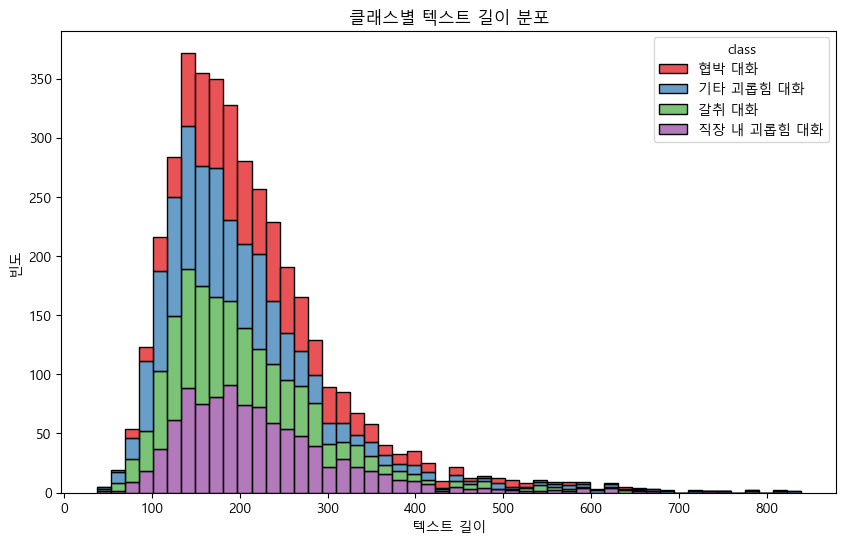

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 텍스트 길이 계산
train_data['text_length'] = train_data['cleaned_conversation'].apply(len)

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
# plt.rcParams['font.family'] = 'AppleGothic'  # macOS
plt.rcParams['axes.unicode_minus'] = False

# 클래스별 텍스트 길이 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='text_length', hue='class', multiple='stack', bins=50, palette='Set1')
plt.title('클래스별 텍스트 길이 분포')
plt.xlabel('텍스트 길이')
plt.ylabel('빈도')
plt.show()

In [31]:
import numpy as np
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# 파일 경로 설정
train_file_path = 'data/mnt/train.csv'
export_path = 'data/'
train_data = pd.read_csv(train_file_path)

# 텍스트 정제 함수
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # 다중 공백 제거
    text = re.sub(r'[^\w\s]', '', text)  # 특수 문자 제거
    return text.strip()

train_data['cleaned_conversation'] = train_data['conversation'].apply(clean_text)
train_data['text_length'] = train_data['cleaned_conversation'].apply(len)

# 토크나이저 설정
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['cleaned_conversation'])

# 시퀀스 변환 및 패딩
sequences = tokenizer.texts_to_sequences(train_data['cleaned_conversation'])
max_length = 300
X_data = pad_sequences(sequences, maxlen=max_length, padding='post')

# 레이블 인코딩
label_encoder = LabelEncoder()
y_data = label_encoder.fit_transform(train_data['class'])

# 결과 확인
print('토크나이저 단어 개수:', len(tokenizer.word_index))
print('X_data 크기:', X_data.shape)
print('y_data 크기:', y_data.shape)

토크나이저 단어 개수: 52568
X_data 크기: (3950, 300)
y_data 크기: (3950,)


In [32]:
# 전처리된 데이터 저장
np.save(export_path + 'X_data.npy', X_data)
np.save(export_path + 'y_data.npy', y_data)

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense

# 입력 정의
input_layer = Input(shape=(max_length,), name='input')

# 임베딩 층
embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128)(input_layer)

# LSTM 층
lstm_layer = LSTM(64)(embedding_layer)

# 출력층 정의
num_classes = 4
output_layer = Dense(num_classes, activation='softmax', name='output')(lstm_layer)

# 모델 생성
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 요약
model.summary()



Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 300)]             0         
                                                                 
 embedding_9 (Embedding)     (None, 300, 128)          6728832   
                                                                 
 lstm_18 (LSTM)              (None, 64)                49408     
                                                                 
 output (Dense)              (None, 4)                 260       
                                                                 
Total params: 6,778,500
Trainable params: 6,778,500
Non-trainable params: 0
_________________________________________________________________


In [46]:
# 데이터 로드
padded_sequences = np.load('data/X_data.npy')
labels = np.load('data/y_data.npy')

# 모델 학습
history = model.fit(
    padded_sequences, labels,
    epochs=20,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/20
99/99 [==============================] - 3s 23ms/step - loss: 1.3849 - accuracy: 0.2785 - val_loss: 1.3896 - val_accuracy: 0.2494
Epoch 2/20
99/99 [==============================] - 2s 20ms/step - loss: 1.3833 - accuracy: 0.2839 - val_loss: 1.3978 - val_accuracy: 0.2494
Epoch 3/20
99/99 [==============================] - 2s 20ms/step - loss: 1.3837 - accuracy: 0.2839 - val_loss: 1.3899 - val_accuracy: 0.2494
Epoch 4/20
99/99 [==============================] - 2s 19ms/step - loss: 1.3832 - accuracy: 0.2839 - val_loss: 1.3911 - val_accuracy: 0.2494
Epoch 5/20
99/99 [==============================] - 2s 20ms/step - loss: 1.3829 - accuracy: 0.2839 - val_loss: 1.3901 - val_accuracy: 0.2494
Epoch 6/20
99/99 [==============================] - 2s 19ms/step - loss: 1.3835 - accuracy: 0.2839 - val_loss: 1.3910 - val_accuracy: 0.2494
Epoch 7/20
99/99 [==============================] - 2s 19ms/step - loss: 1.3827 - accuracy: 0.2839 - val_loss: 1.3915 - val_accuracy: 0.2494
Epoch 8/20
99

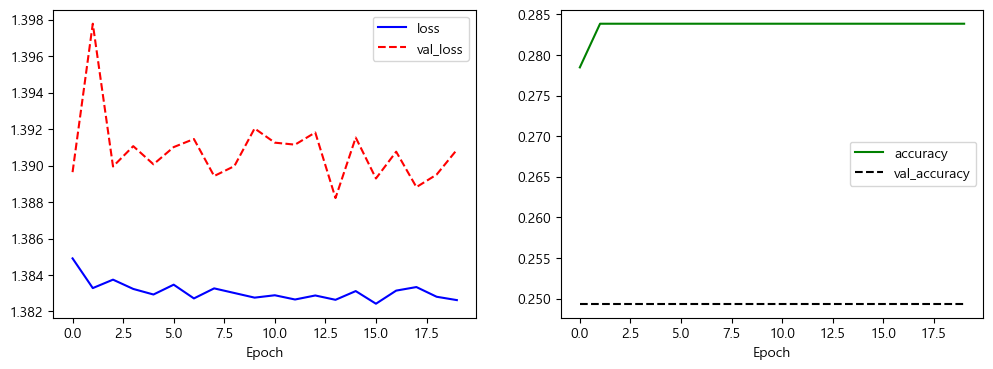

In [47]:
# 학습 결과 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

# 1. CNN 구조를 엮은 모델

In [48]:
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense

input_layer = Input(shape=(max_length,), name='input')

embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128)(input_layer)

conv_layer = Conv1D(filters=128, kernel_size=5, activation='relu')(embedding_layer)
polling_layer = GlobalMaxPooling1D()(conv_layer)

output_layer = Dense(num_classes, activation='softmax', name='output')(polling_layer)

model_conv = Model(inputs=input_layer, outputs=output_layer)
model_conv.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_conv.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 300)]             0         
                                                                 
 embedding_10 (Embedding)    (None, 300, 128)          6728832   
                                                                 
 conv1d_1 (Conv1D)           (None, 296, 128)          82048     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 output (Dense)              (None, 4)                 516       
                                                                 
Total params: 6,811,396
Trainable params: 6,811,396
Non-trainable params: 0
________________________________________________

In [49]:
con_history = model.fit(
    padded_sequences,
    labels,
    epochs=20,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/20
99/99 [==============================] - 2s 19ms/step - loss: 1.3826 - accuracy: 0.2839 - val_loss: 1.3919 - val_accuracy: 0.2494
Epoch 2/20
99/99 [==============================] - 2s 19ms/step - loss: 1.3825 - accuracy: 0.2839 - val_loss: 1.3904 - val_accuracy: 0.2494
Epoch 3/20
99/99 [==============================] - 2s 19ms/step - loss: 1.3829 - accuracy: 0.2839 - val_loss: 1.3906 - val_accuracy: 0.2494
Epoch 4/20
99/99 [==============================] - 2s 19ms/step - loss: 1.3825 - accuracy: 0.2839 - val_loss: 1.3907 - val_accuracy: 0.2494
Epoch 5/20
99/99 [==============================] - 2s 19ms/step - loss: 1.3830 - accuracy: 0.2839 - val_loss: 1.3906 - val_accuracy: 0.2494
Epoch 6/20
99/99 [==============================] - 2s 19ms/step - loss: 1.3827 - accuracy: 0.2839 - val_loss: 1.3903 - val_accuracy: 0.2494
Epoch 7/20
99/99 [==============================] - 2s 18ms/step - loss: 1.3826 - accuracy: 0.2839 - val_loss: 1.3911 - val_accuracy: 0.2494
Epoch 8/20
99

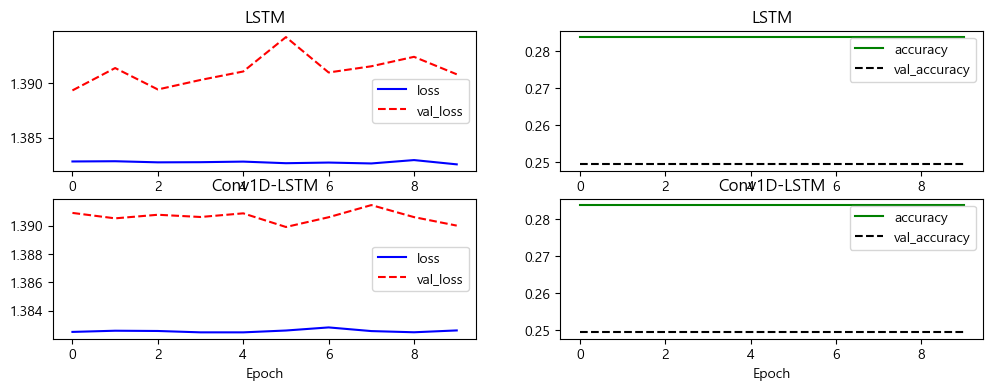

In [ ]:
# 학습 결과 시각화
plt.figure(figsize=(12, 4))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.title('LSTM')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.title('LSTM')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(con_history.history['loss'], 'b-', label='loss')
plt.plot(con_history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.title('Conv1D-LSTM')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(con_history.history['accuracy'], 'g-', label='accuracy')
plt.plot(con_history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.title('Conv1D-LSTM')
plt.legend()

plt.show()